In [2]:
# Let's start by reading the contents of the uploaded file to understand its structure.
import pandas as pd

# Load the file into a DataFrame
file_path = '1_3V.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure

,X,CH1,CH2,Start,Increment,Unnamed: 5
0,Sequence,Volt,Volt,-0.003,0.000005,NaN
1,0,-3.20e+00,8.60e+00,NaN,NaN,NaN
2,1,-3.60e+00,9.00e+00,NaN,NaN,NaN
3,2,-3.20e+00,8.60e+00,NaN,NaN,NaN
4,3,-4.00e+00,9.00e+00,NaN,NaN,NaN


5e-06

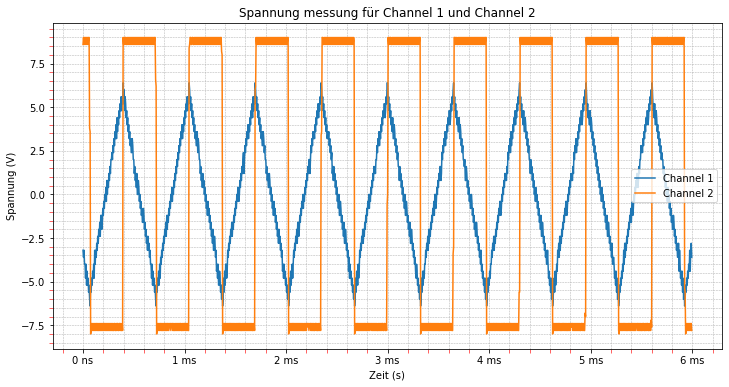

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
# Implementing the provided helper functions for formatting labels

def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')

# Testing the formatting functions
test_values = [0.000001, 0.001, 1, 1000, 1000000, 1000000000]
test_units = [format_time(value, None) for value in test_values]

test_values, test_units


# Skipping the first row which is header information and parsing the relevant data
data_cleaned = data.iloc[1:].copy()  # Skipping the first row with meta information
data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')

# Since the sampling frequency is 600Hz, the time between each sample is 1/600 seconds
#sampling_frequency = 500/3*1000

sampling_interval = data["Increment"][0]#1 / sampling_frequency
total_samples = data_cleaned.shape[0]
time = np.arange(0, total_samples * sampling_interval, sampling_interval)[:total_samples]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, data_cleaned['CH1'], label='Integrator')
plt.plot(time, data_cleaned['CH2'], label='Verstärker')
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (V)')
plt.title('Spannung messung für Dreieck- Rechteck-VCO')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Minor ticks can be made denser by specifying the number of intervals within the data range
# This is especially useful when the automatic grid does not provide enough detail
min_x = min(time)
max_x = max(time)
min_y = min(min(data_cleaned['CH1']), min(data_cleaned['CH2']))
max_y = max(max(data_cleaned['CH1']), max(data_cleaned['CH2']))

# Setting minor ticks
plt.minorticks_on()
plt.tick_params(which='minor', length=4, color='r')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))

plt.savefig("dreieckrechteck VCO")
plt.show()




In [11]:
76-12

64

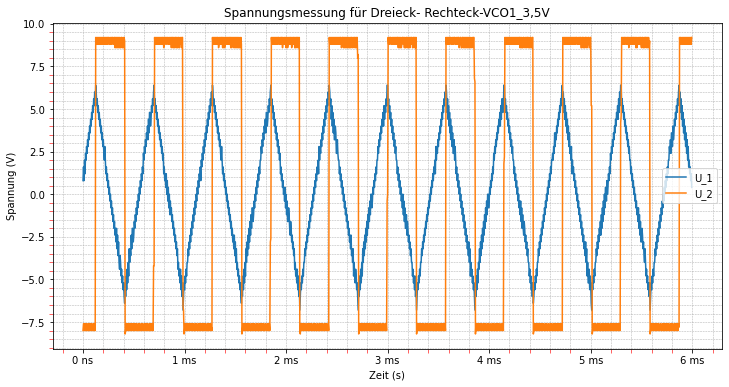

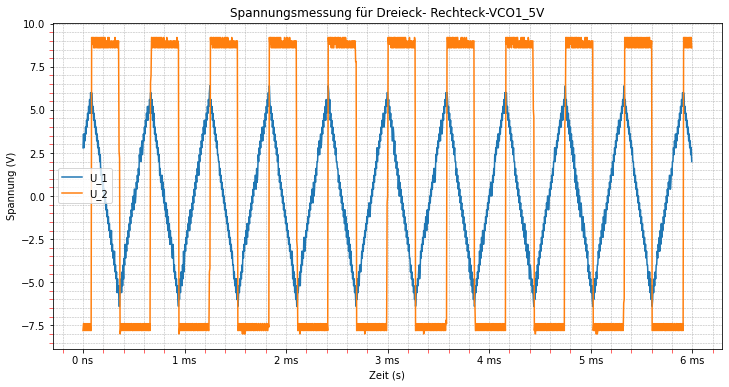

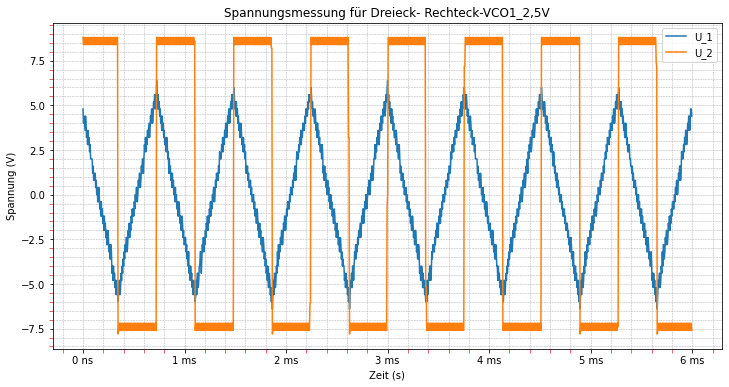

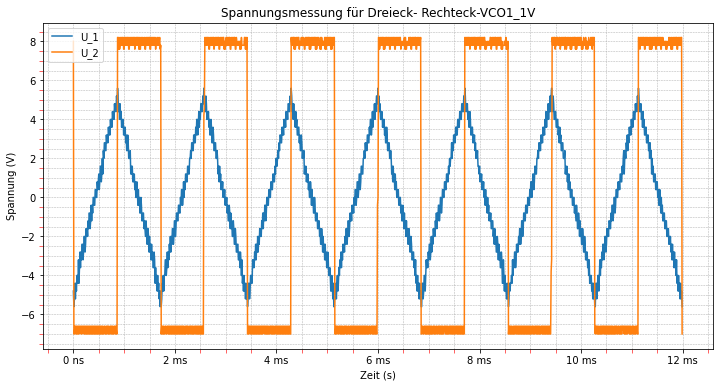

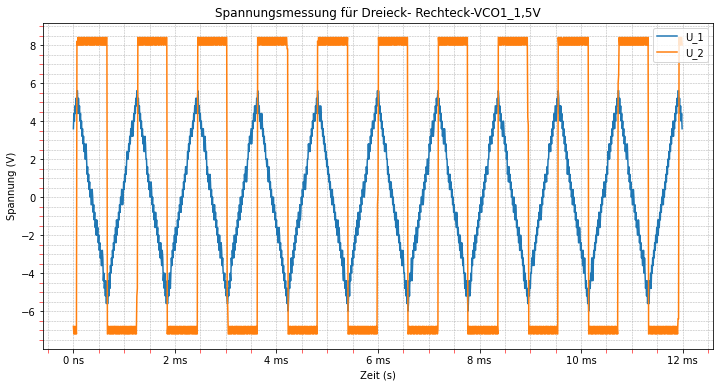

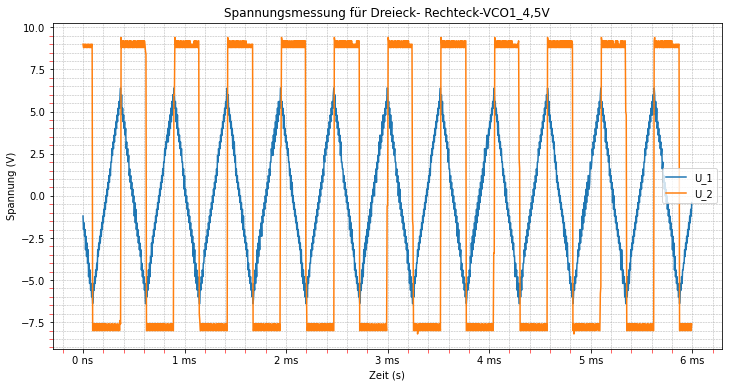

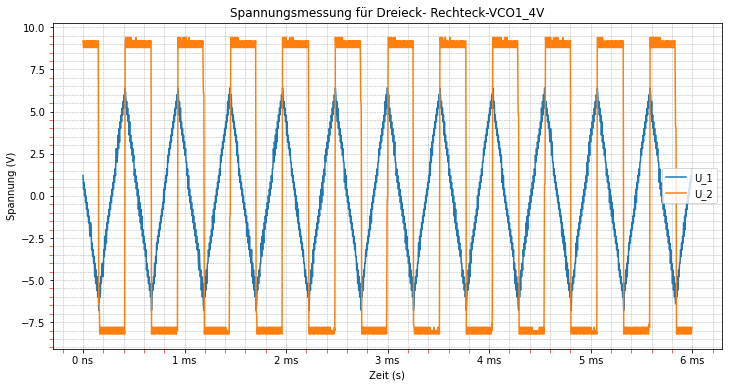

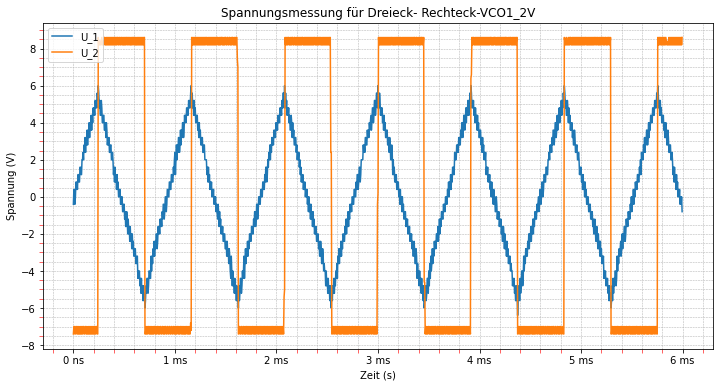

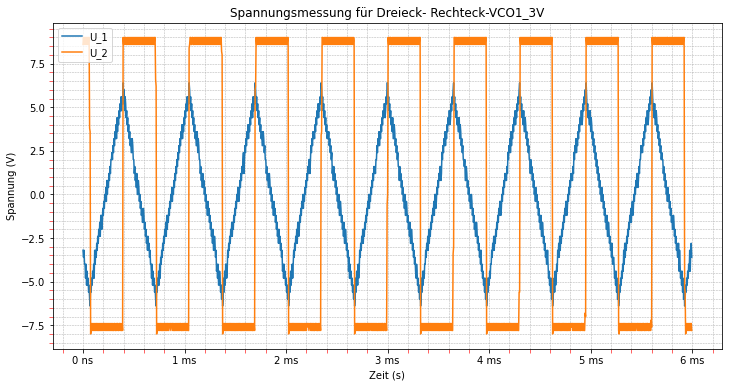

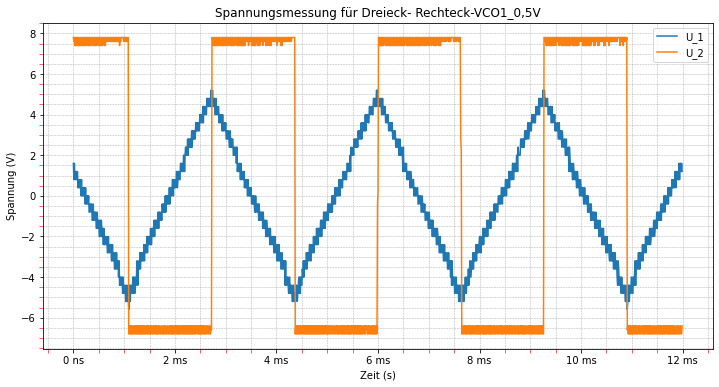

In [33]:
import os
def plot_vco_voltage(data, title, filename, legendnames):
    data_cleaned = data.iloc[1:].copy()  # Skipping the first row with meta information
    data_cleaned['CH1'] = pd.to_numeric(data_cleaned['CH1'], errors='coerce')
    data_cleaned['CH2'] = pd.to_numeric(data_cleaned['CH2'], errors='coerce')
    sampling_interval = data["Increment"][0]
    total_samples = data_cleaned.shape[0]
    time = np.arange(0, total_samples * sampling_interval, sampling_interval)[:total_samples]
    plt.figure(figsize=(12, 6))
    plt.plot(time, data_cleaned['CH1'], label=legendnames[0])
    plt.plot(time, data_cleaned['CH2'], label=legendnames[1])
    plt.xlabel('Zeit (s)')
    plt.ylabel('Spannung (V)')
    plt.title(title)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tick_params(which='minor', length=4, color='r')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
    plt.savefig(filename)
    plt.show()
directory_path = '.'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
for file in csv_files:
    data = pd.read_csv(os.path.join(directory_path, file))
    title = 'Spannungsmessung für Dreieck- Rechteck-VCO'+os.path.splitext(file)[0]
    filename = os.path.splitext(file)[0] + '_vco_plot.pdf'  # Save plot as PNG with original file name
    legendnames = ['U_1', 'U_2']
    plot_vco_voltage(data, title, filename, legendnames)
